In [11]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
with open("param.yaml", "r", encoding="utf-8") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [4]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [5]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [6]:
output = np.load("output.npy")
output

array([ 0.01654649,  0.16112307,  0.30510437,  0.44097352,  0.56163955,
        0.66201341,  0.74003971,  0.79642975,  0.83357048,  0.85441953,
        0.86180389,  0.85811198,  0.84522128,  0.82452834,  0.79701054,
        0.76328605,  0.72366089,  0.67816198,  0.62655699,  0.56836528,
        0.50286621,  0.42911607,  0.3459923 ,  0.25229704,  0.1469681 ,
        0.02945682, -0.0996891 , -0.23809883, -0.38098493, -0.5212028 ,
       -0.65042198, -0.76122153, -0.84903777, -0.9128381 , -0.95436585,
       -0.97675085, -0.98331642, -0.97691214, -0.95968974, -0.93312752,
       -0.89814413, -0.85521936, -0.80449522, -0.74585247, -0.67896879,
       -0.60337639, -0.5185343 , -0.4239355 , -0.31928048, -0.20473751,
       -0.0812991 ,  0.04881743,  0.18187004,  0.31265262,  0.43514982,
        0.54374129,  0.6344611 ,  0.70565248,  0.75775582,  0.79254967,
        0.81235099,  0.81946206,  0.81588984,  0.80324817,  0.78275299,
        0.75525415,  0.72127324,  0.68103683,  0.63449937,  0.58

In [7]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.15056372e-01],
       [  2.00000000e+01,   4.76791680e-01],
       [  3.00000000e+01,   4.52040404e-01],
       [  4.00000000e+01,   3.45015705e-01],
       [  5.00000000e+01,   1.56736910e-01],
       [  6.00000000e+01,   1.08477518e-01],
       [  7.00000000e+01,   9.53152627e-02],
       [  8.00000000e+01,   6.76553473e-02],
       [  9.00000000e+01,   5.81273548e-02],
       [  1.00000000e+02,   4.52180803e-02],
       [  1.10000000e+02,   4.08457704e-02],
       [  1.20000000e+02,   3.32539268e-02],
       [  1.30000000e+02,   2.90431809e-02],
       [  1.40000000e+02,   2.76489779e-02],
       [  1.50000000e+02,   2.66647171e-02],
       [  1.60000000e+02,   2.17767339e-02],
       [  1.70000000e+02,   1.97854806e-02],
       [  1.80000000e+02,   1.68111809e-02],
       [  1.90000000e+02,   1.62793864e-02],
       [  2.00000000e+02,   1.42827295e-02],
       [  2.10000000e+02,   1.22441305e-02],
       [  2.20000000e+02,   1.11140134e-02],
       [  

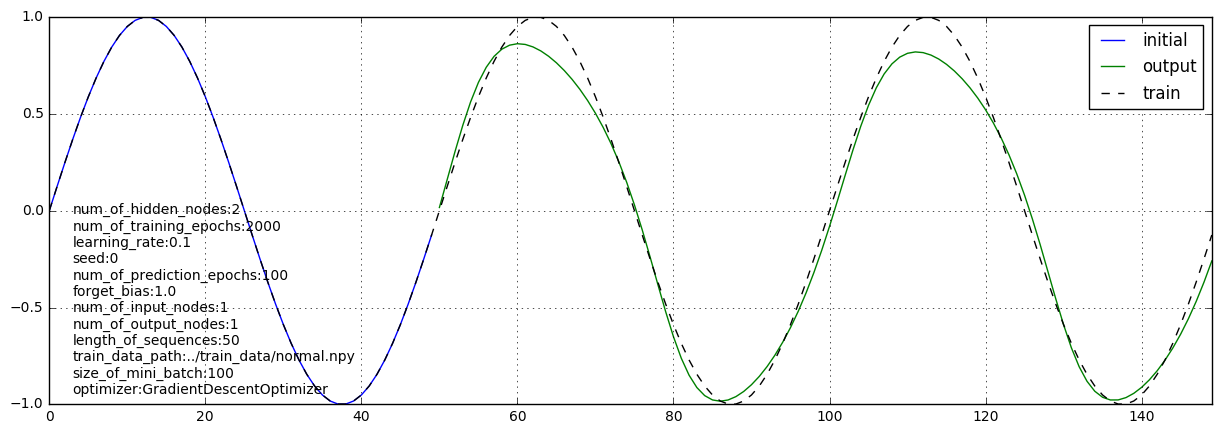

In [41]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

# Annotation
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xt, yt = 0.02*(xmax-xmin)+xmin, 0.02*(ymax-ymin)+ymin
plt.text(xt, yt, "\n".join(["{}:{}".format(k,v) for k,v in param.items()]), ha = 'left', va = 'bottom') # 指定した座標の上にテキストを追加
# save
plt.savefig("predict.png")

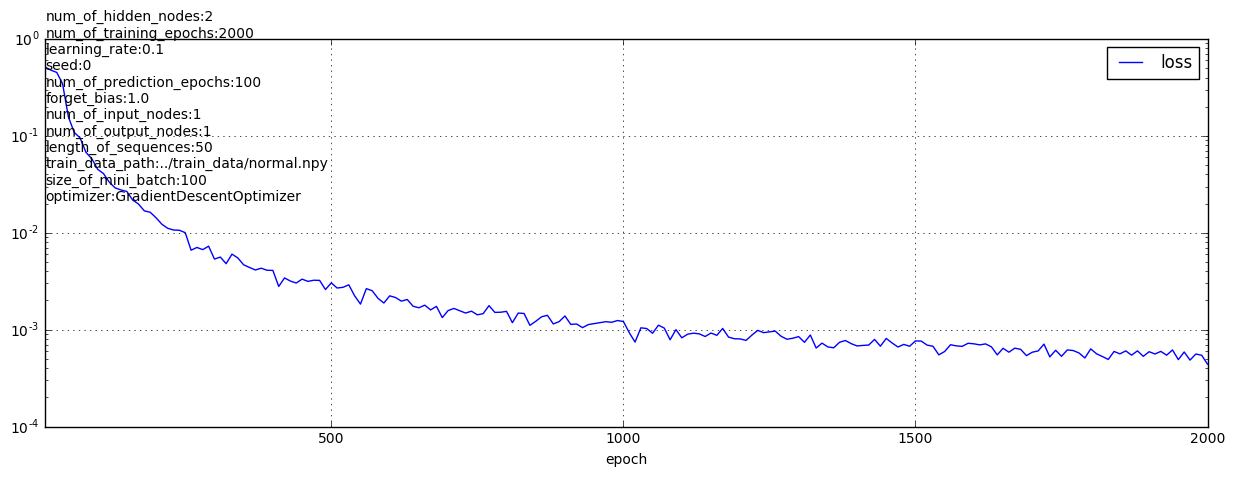

In [43]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")

# Annotation
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xt, yt = 0.0002*(xmax-xmin)+xmin, 0.02*(ymax-ymin)+ymin
plt.text(xt, yt, "\n".join(["{}:{}".format(k,v) for k,v in param.items()]), ha = 'left', va = 'bottom')
# save
plt.savefig("loss.png")